# Import Libraries


In [52]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import os


In [53]:
#!python3 -m spacy download en_core_web_sm

In [54]:
# Load Spacy English Language Model
# Name Entity Recognition
model_dir = "en_core_web_sm"
NER = spacy.load(model_dir)

In [55]:
!python -m spacy validate



✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.7.4) =================
ℹ spaCy installation:
/Users/pavankumar/Projects/Witcher_project/lib/python3.11/site-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.7.2,<3.8.0   3.7.1   ✔



In [56]:
spacy.info()

{'spacy_version': '3.7.4',
 'location': '/Users/pavankumar/Projects/Witcher_project/lib/python3.11/site-packages/spacy',
 'platform': 'macOS-14.3.1-arm64-arm-64bit',
 'python_version': '3.11.7',
 'pipelines': {'en_core_web_sm': '3.7.1'}}

## Load the Books

In [57]:
# get all book files in data dictionary
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [58]:
all_books

[<DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '1 The Last Wish.txt'>,
 <DirEntry '8 something ends something begins.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>]

In [59]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

## Visualize identify Entities

In [60]:
displacy.render(book_doc[0 : 2000], style = 'ent', jupyter = True)

In [95]:
# Load the characters data
characters  =  pd.read_csv('Characters data.csv')
characters.head(100)

,Unnamed: 0,Book Name,Character
0,0,Category:Baptism of Fire characters,Adalia
1,1,Category:Baptism of Fire characters,Adela
2,2,Category:Baptism of Fire characters,Aen Saevherne
3,3,Category:Baptism of Fire characters,Aevenien
4,4,Category:Baptism of Fire characters,Aglaïs
5,5,Category:Baptism of Fire characters,Albrich
6,6,Category:Baptism of Fire characters,Amavet
7,7,Category:Baptism of Fire characters,Angus Bri Cri
8,8,Category:Baptism of Fire characters,Anna Kameny
9,9,Category:Baptism of Fire characters,Anzelm Aubry


## Using Regural Eexpression removing the unwanted (-text-) in brackets


In [62]:
import re
characters['Character'] = characters['Character'].apply(lambda x : re.sub("[\(].*?[\)]","",x))
characters['First Name'] = characters['Character'].apply(lambda x : x.split(" ", 1)[0])

In [96]:
#pd.set_option('display.max_rows', None)
characters.head(100)

,Unnamed: 0,Book Name,Character
0,0,Category:Baptism of Fire characters,Adalia
1,1,Category:Baptism of Fire characters,Adela
2,2,Category:Baptism of Fire characters,Aen Saevherne
3,3,Category:Baptism of Fire characters,Aevenien
4,4,Category:Baptism of Fire characters,Aglaïs
5,5,Category:Baptism of Fire characters,Albrich
6,6,Category:Baptism of Fire characters,Amavet
7,7,Category:Baptism of Fire characters,Angus Bri Cri
8,8,Category:Baptism of Fire characters,Anna Kameny
9,9,Category:Baptism of Fire characters,Anzelm Aubry


### Get Name Entity list per sentence

In [64]:
sentence_entity = []

# loop through sentences, store name entity list for each sentence
for sent in book_doc.sents:
  entity_list = [ent.text for ent in sent.ents]
  sentence_entity.append({'Sentence' : sent, 'Entities' : entity_list})

sentence_entity_df = pd.DataFrame(sentence_entity)

In [97]:
sentence_entity_df.head(100)

,Sentence,Entities,Character Entites
0,"(﻿Verily, I, say, unto, you, ,, the, era, of, ...",[wolf],[]
1,"(The, Time, \n, of, the, White, Chill, and, th...","[Time, the White Chill, the White Light, the T...",[]
2,"(The, world, will, die, amidst, frost, and, be...",[],[]
3,"(It, will, be, reborn, of, the, Elder, Blood, ...","[the Elder Blood, Hen Ichaer]",[]
4,"(A, seed, which, \n, will, not, sprout, but, w...",[],[]
5,"(Ess'tuath, esse, !)",[],[]
6,"(Thus, it, shall, be, !)",[],[]
7,"(Watch, for, the, signs, !)",[],[]
8,"(What, signs, these, shall, be, ,, I, say, unt...","[first, earth, Aen Seidhe, the Blood of Elves,...",[Aevenien]
9,"(The, town, was, in, flames, ., \n)",[],[]


In [66]:
# Function to filter out non-character entites
def filter_entity(ent_list, character_df):
  return[ent for ent in ent_list
         if ent in list(character_df['Character'])
         or ent in list(character_df['First Name'])]

### Example
 here it will only look for the characters which are present in the character data and the rest is been removed

In [67]:
# example
filter_entity(['Adela', 'the', 4], characters)

['Adela']

In [68]:
sentence_entity_df['Character Entites'] = sentence_entity_df['Entities'].apply(lambda x: filter_entity(x, characters))
sentence_entity_df.head(100)

,Sentence,Entities,Character Entites
0,"(﻿Verily, I, say, unto, you, ,, the, era, of, ...",[wolf],[]
1,"(The, Time, \n, of, the, White, Chill, and, th...","[Time, the White Chill, the White Light, the T...",[]
2,"(The, world, will, die, amidst, frost, and, be...",[],[]
3,"(It, will, be, reborn, of, the, Elder, Blood, ...","[the Elder Blood, Hen Ichaer]",[]
4,"(A, seed, which, \n, will, not, sprout, but, w...",[],[]
5,"(Ess'tuath, esse, !)",[],[]
6,"(Thus, it, shall, be, !)",[],[]
7,"(Watch, for, the, signs, !)",[],[]
8,"(What, signs, these, shall, be, ,, I, say, unt...","[first, earth, Aen Seidhe, the Blood of Elves,...",[Aevenien]
9,"(The, town, was, in, flames, ., \n)",[],[]


# filter out the sentences that don't have any character entitiy

In [98]:
sentence_entity_filtered_df = sentence_entity_df[sentence_entity_df['Character Entites'].map(len)> 0]
sentence_entity_filtered_df.head(100)

,Sentence,Entities,Character Entites
8,"(What, signs, these, shall, be, ,, I, say, unt...","[first, earth, Aen Seidhe, the Blood of Elves,...",[Aevenien]
14,"(Ciri, felt, the, knight, who, carried, her, b...",[Ciri],[Ciri]
18,"(Ciri, caught, a, glimpse, of, the, skirmish, ...",[Ciri],[Ciri]
64,"(Ciri, sees, his, eyes, gleaming, through, the...","[Ciri, prey]",[Ciri]
67,"(Ciri, is, unable, to, move, .)",[Ciri],[Ciri]
70,"(And, she, is, frozen, in, fear, :, a, terribl...",[Ciri],[Ciri]
130,"(Ciri, sees, his, eyes, gleaming, through, the...","[Ciri, prey]",[Ciri]
133,"(Ciri, is, unable, to, move, .)",[Ciri],[Ciri]
136,"(And, she, is, frozen, in, fear, :, a, terribl...",[Ciri],[Ciri]
163,"(Ciri, shuddered, violently, ,, curling, her, ...",[Ciri],[Ciri]


In [70]:
# Take only first names of characters
sentence_entity_filtered_df['Character Entites'] = sentence_entity_filtered_df['Character Entites'].apply(lambda x : [item.split()[0] for item in x])

/var/folders/sw/dvn0nz5x7mj3y2t1bbkd798h0000gn/T/ipykernel_1562/2209541303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentence_entity_filtered_df['Character Entites'] = sentence_entity_filtered_df['Character Entites'].apply(lambda x : [item.split()[0] for item in x])


In [71]:
pd.reset_option('^display.', silent = True)
sentence_entity_filtered_df

,Sentence,Entities,Character Entites
8,"(What, signs, these, shall, be, ,, I, say, unt...","[first, earth, Aen Seidhe, the Blood of Elves,...",[Aevenien]
14,"(Ciri, felt, the, knight, who, carried, her, b...",[Ciri],[Ciri]
18,"(Ciri, caught, a, glimpse, of, the, skirmish, ...",[Ciri],[Ciri]
64,"(Ciri, sees, his, eyes, gleaming, through, the...","[Ciri, prey]",[Ciri]
67,"(Ciri, is, unable, to, move, .)",[Ciri],[Ciri]
...,...,...,...
10635,"(Take, care, of, her, ,, Yennefer, .)",[Yennefer],[Yennefer]
10639,"(Nenneke, did, not, look, at, \n, them, ., \n)",[Nenneke],[Nenneke]
10642,"(It, might, turn, out, to, be, true, ,, what, ...","[Ithlinne, Aevenien]","[Ithlinne, Aevenien]"
10645,"(Take, care, of, her, ,, Yennefer, .)",[Yennefer],[Yennefer]


# Create Relationship

In [72]:
window_size = 5
relationships = []

for i in range(sentence_entity_filtered_df.index[-1]):
  end_i = min(i + 5, sentence_entity_filtered_df.index[-1])
  char_list = sum((sentence_entity_filtered_df.loc[i: end_i]['Character Entites']),[])

  # Remove dupilcate characters next to each other
  char_unique = [char_list[i] for i in range(len(char_list))
                if (i == 0) or char_list[i] != char_list[i-1]]

  if len(char_unique) > 1:
    for idx, a in enumerate(char_unique[:-1]):
      b = char_unique[idx + 1]
      relationships.append({'source' : a, 'target' : b})



In [99]:
relationships_df = pd.DataFrame(relationships)
pd.set_option('^display.max_rows',None)
relationships_df.head(200)

,source,target
0,Ciri,Geralt
1,Ciri,Geralt
2,Ciri,Geralt
3,Ciri,Geralt
4,Geralt,Yennefer
5,Geralt,Yennefer
6,Yennefer,Cirilla
7,Geralt,Yennefer
8,Yennefer,Cirilla
9,Geralt,Yennefer


# Lets sort the source and target entities properly

In [74]:
pd.set_option('^display.max_rows',None)
np.sort(relationships_df.values)

array([['Ciri', 'Geralt'],
       ['Ciri', 'Geralt'],
       ['Ciri', 'Geralt'],
       ...,
       ['Ciri', 'Yennefer'],
       ['Ciri', 'Yennefer'],
       ['Ciri', 'Yennefer']], dtype=object)

In [101]:
# sort the case with a -> b and b->a
relationships_df = pd.DataFrame(np.sort(relationships_df.values, axis =1), columns = relationships_df.columns)
relationships_df.head(100)

,source,target
0,Ciri,Geralt
1,Ciri,Geralt
2,Ciri,Geralt
3,Ciri,Geralt
4,Geralt,Yennefer
5,Geralt,Yennefer
6,Cirilla,Yennefer
7,Geralt,Yennefer
8,Cirilla,Yennefer
9,Geralt,Yennefer


In [102]:
# add a value weigths as 1 to each row
relationships_df['value'] = 1
relationships_df = relationships_df.groupby(['source', 'target'], sort = False, as_index = False).sum()
relationships_df.head()

,source,target,value
0,Ciri,Geralt,297
1,Geralt,Yennefer,128
2,Cirilla,Yennefer,5
3,Cirilla,Dandelion,4
4,Donimir,Sheldon,5


# Graph analysis and Visualization


In [89]:
# create a graph from pandas dataframe
G = nx.from_pandas_edgelist(relationships_df,
                            source = 'source',
                            target = 'target',
                            edge_attr = 'value',
                            create_using = nx.Graph())

#### Graph. Visualization - Networkx

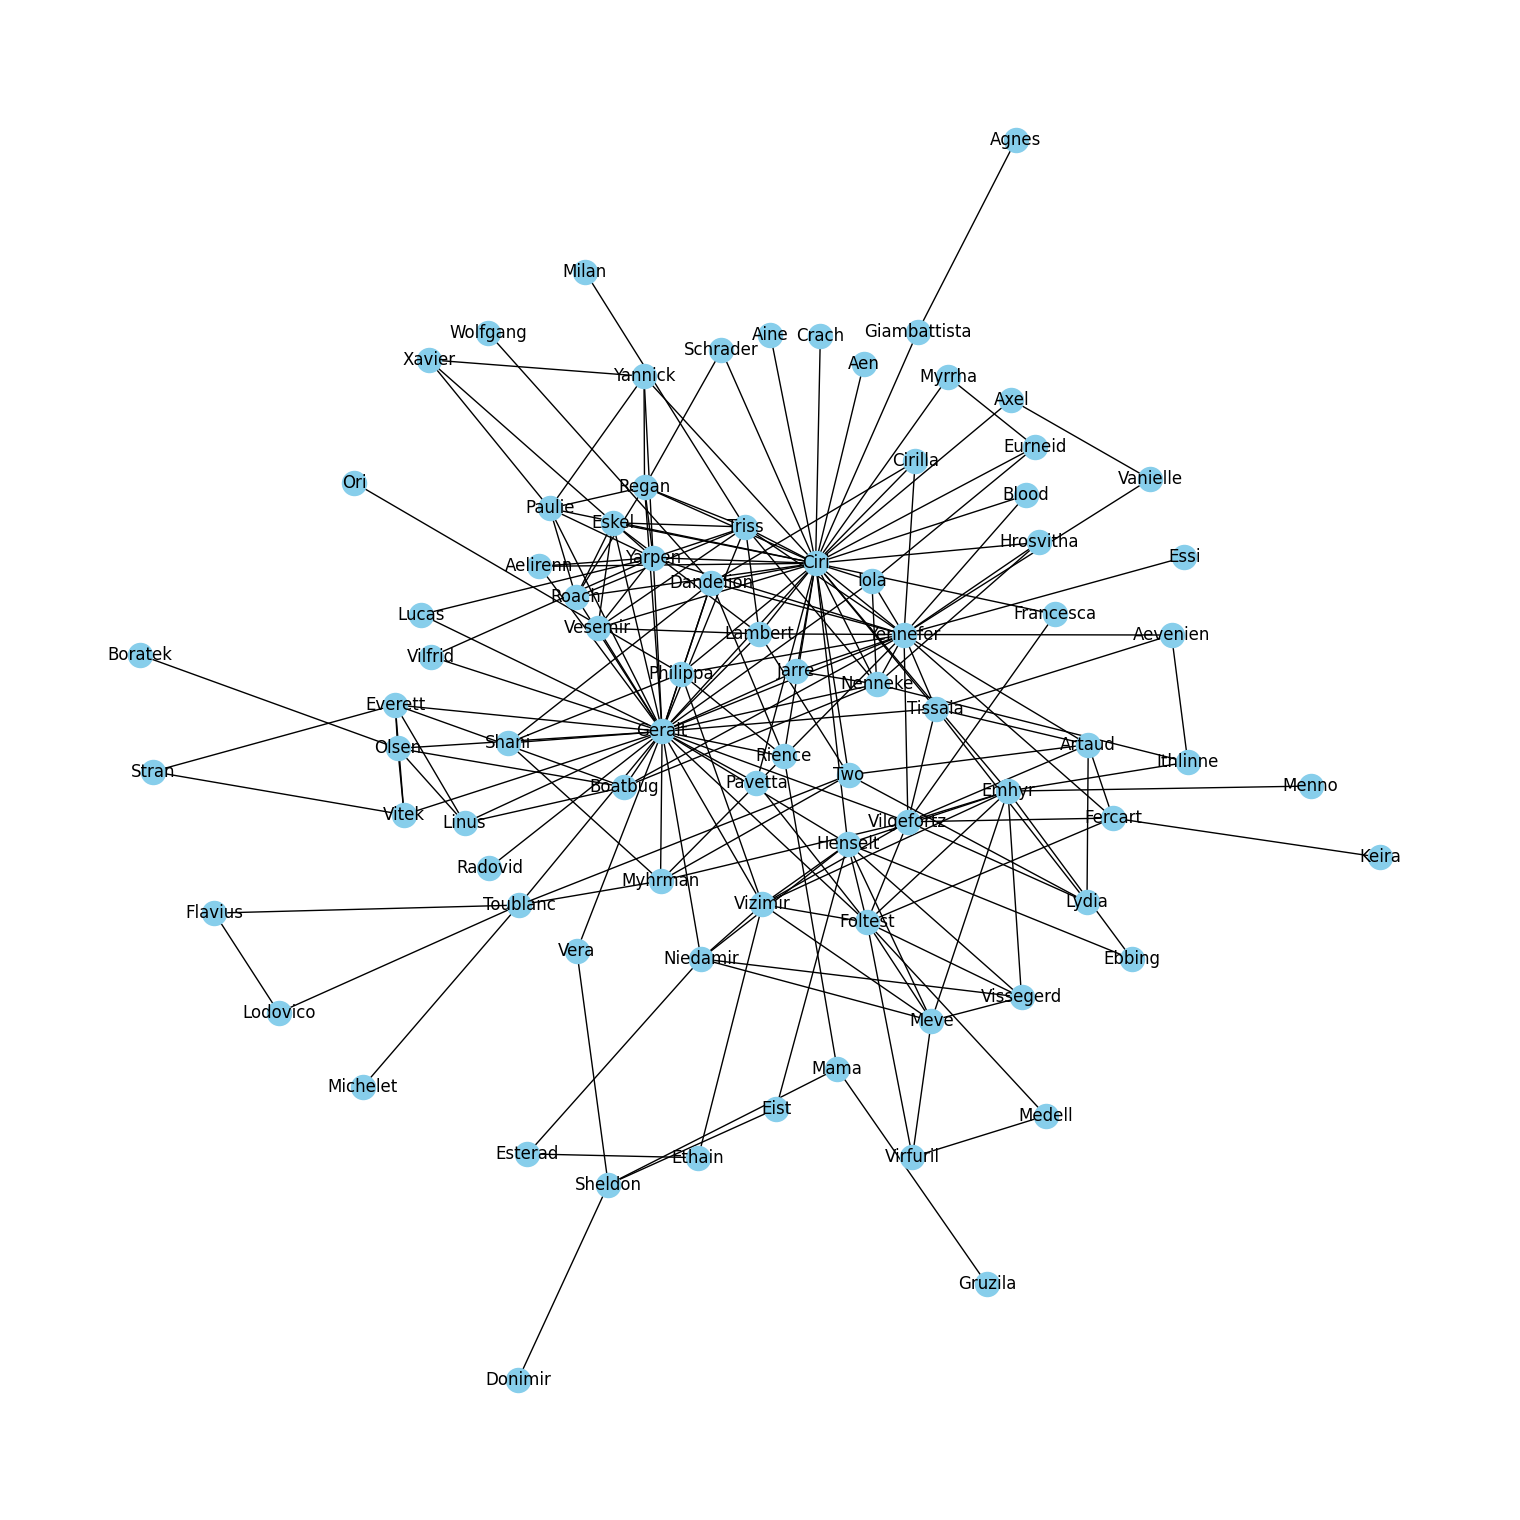

In [90]:
plt.figure(figsize = (15, 15))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = plt.cm.Blues, pos = pos)

In [91]:
from pyvis.network import Network
from IPython.display import HTML

net = Network(notebook=True, width='1920px', height='1080px', bgcolor='#222222', font_color='orange', cdn_resources='remote')
node_degree = dict(G.degree)
# setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show("witcher.html")

# Display the HTML content in the notebook
HTML(net.html)


witcher.html


## Most Important characters in witcher

In [80]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Ciri': 0.4268292682926829,
 'Geralt': 0.43902439024390244,
 'Yennefer': 0.2682926829268293,
 'Cirilla': 0.03658536585365854,
 'Dandelion': 0.0975609756097561,
 'Donimir': 0.012195121951219513,
 'Sheldon': 0.04878048780487805,
 'Vera': 0.024390243902439025,
 'Pavetta': 0.03658536585365854,
 'Eist': 0.024390243902439025,
 'Mama': 0.03658536585365854,
 'Rience': 0.08536585365853659,
 'Gruzila': 0.012195121951219513,
 'Niedamir': 0.07317073170731708,
 'Roach': 0.07317073170731708,
 'Eskel': 0.07317073170731708,
 'Vesemir': 0.07317073170731708,
 'Lambert': 0.08536585365853659,
 'Triss': 0.13414634146341464,
 'Two': 0.07317073170731708,
 'Nenneke': 0.10975609756097561,
 'Axel': 0.024390243902439025,
 'Vanielle': 0.024390243902439025,
 'Fercart': 0.06097560975609756,
 'Foltest': 0.13414634146341464,
 'Keira': 0.012195121951219513,
 'Artaud': 0.07317073170731708,
 'Vilgefortz': 0.13414634146341464,
 'Milan': 0.012195121951219513,
 'Yarpen': 0.14634146341463417,
 'Xavier': 0.03658536585365854

<Axes: >

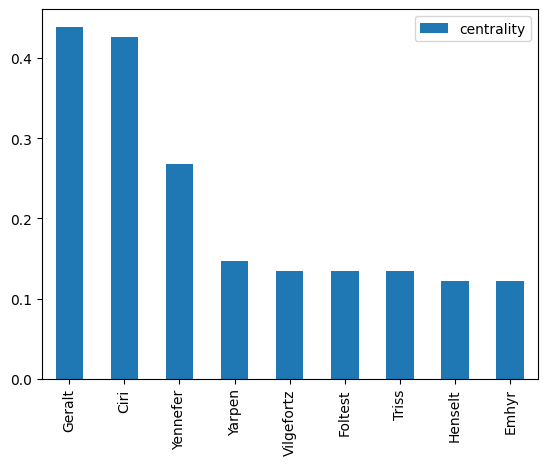

In [81]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient = 'index', columns = ['centrality'])
# plot for top 10
degree_df.sort_values('centrality', ascending = False)[0:9].plot(kind = 'bar')

<Axes: >

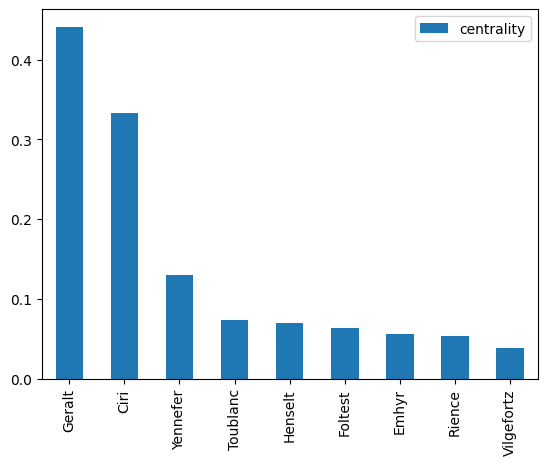

In [82]:
# Betweeness Centrality
betweeness_dict = nx.betweenness_centrality(G)
betweeness_df = pd.DataFrame.from_dict(betweeness_dict, orient = 'index', columns=['centrality'])
# plot for top 10
betweeness_df.sort_values('centrality', ascending = False)[0:9].plot(kind = 'bar')

<Axes: >

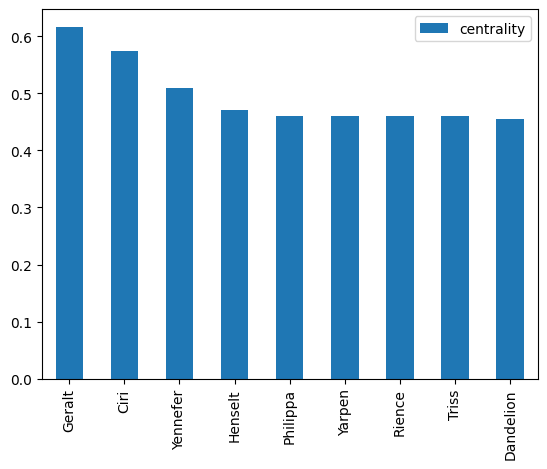

In [83]:
# Closeness Centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient = 'index', columns = ['centrality'])
# plot for top 10
closeness_df.sort_values('centrality', ascending = False)[0:9].plot(kind = 'bar')

In [84]:
# Save the centrality measures
nx.set_node_attributes(G, degree_dict, 'Degree Centrality')
nx.set_node_attributes(G, betweeness_dict, 'Betweeness Centrality')
nx.set_node_attributes(G, closeness_dict, 'Closeness Centrality')

# Community Detection

In [92]:
import community as community_louvain
communities = community_louvain.best_partition(G)

nx.set_node_attributes(G, communities, 'group')
com_net = Network(notebook = True, width = '1920px', height = '1080px', bgcolor = '#222222', font_color = 'white', cdn_resources = 'remote')
com_net.from_nx(G)
com_net.show("witcher_communities.html")


witcher_communities.html
